<a href="https://colab.research.google.com/github/Tajyu/TensorFlow-Tutotrial/blob/main/%EA%B8%B0%EB%B3%B8_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 텐서와 케라스를 import
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


### Fashion Mnist 불러오기

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Numpy 형태로 데이터가 들어와있다.

In [4]:
type(train_images)

numpy.ndarray

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               " Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] # 10개

### Label이 숫자 형태로 되어있다.

In [6]:
train_labels[:3]

array([9, 0, 0], dtype=uint8)

## 데이터 탐색

In [7]:
train_images.shape # 60,000개의 이미지가 있고, 28 x 28 형태로 되어있다.

(60000, 28, 28)

In [8]:
len(train_images) # 훈련세트에는 60,000개의 이미지(레이블)가 있다.

60000

In [9]:
train_labels # 각 레이블은 0과 9사이의 정수이다.

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape # 테스트(레이블) 이미지는 10,000개가 있고, 28 x 28 형태이다. -> 1/6 정도가 테스트 이미지(레이블)이다.

(10000, 28, 28)

In [11]:
len(test_images) # 테스트 세트에는 10,000개의 이미지(레이블)가 있다.

10000

## 데이터 전처리
### 네트워크를 훈련하기 전에 데이터를 전처리해야한다.
### 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0 ~ 255 사이라는 것을 알 수 있다.

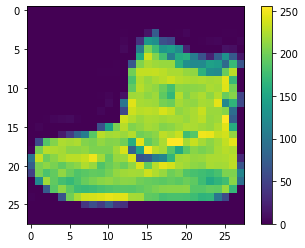

In [12]:
plt.figure()
plt.imshow(train_images[0]) # 인덱스는 0부터 시작이라 첫번째(1) 이미지
plt.colorbar()
plt.grid(False)
plt.show()

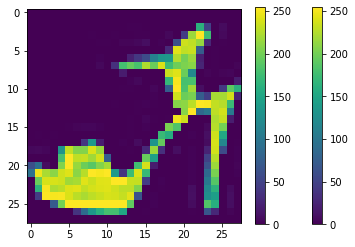

In [13]:
plt.figure()
plt.imshow(train_images[9]) # 인덱스는 0부터 시작이라 아홉번째(9) 이미지
plt.colorbar()
plt.colorbar()
plt.grid(False)
plt.show()

## 신경망 모델에 주입하기 전에 이 값의 범위를 0 ~ 1 사이로 조정한다.
### 이렇게 할려면 255로 나누어야 한다.
### 훈련 세트와 테스트 세트를 동일한 방식으로 전처리해야한다. 

In [14]:
 train_images = train_images / 255.0
 test_images = test_images / 255.0

## 훈련 세트에서 처음 25개의 이미지와 그 아래 클래스 이름을 출력.
### 데이터 포맷이 맞는지 확인하고 네트워크 구성과 훈련을 할 준비를 한다.

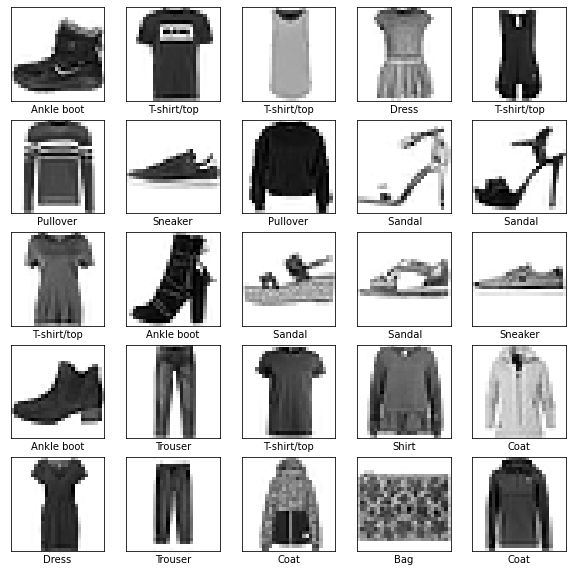

In [15]:
plt.figure(figsize = (10, 10)) # figure 크기를 10 x 10으로 한다.
for i in range(25):
    plt.subplot(5, 5, i + 1) # 5 x 5로 보여진다. -> 5 x 5로 나타나질떄까찌 이미지를 하나씩 증가 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

## 학습된 모델로 새로운 모델 구성
### 신경망 모델을 만들려면 모델의 층을 구성한  다음 모델을 컴파일한다.

## 층 설정
### 신경망의 기본 구성 요소는 층(layer)이다.
### 층(layer)는 주입된 데이터에서 표현을 추출한다.
### 아마도 문제를 해결하는데 더 의미있는 표현이 추출 될 것이다.


### 대부분 딥러닝은 간단한 층을 연결하여 구성된다.
### **tf.keras.layers.Dense**와 같은 층들의 **가중치(parameter)**는 훈련하는 동안 학습된다.

### **keras.layers.Flatten**는 2차원 배열을 1차원 배열로 변환. 즉, 펼친다.

In [16]:
model = keras.Sequential([
                        keras.layers.Flatten(input_shape = (28, 28)), # 28 x 28로 된 텐서를 1차원 텐서로 펼친다. -> 28 x 28 = 784개의 텐서로 펼쳐진다.
                        keras.layers.Dense(128, activation = 'relu'), # relu: 0보다 작으면 0을 반환, 0보다 크면 1을 반환.
                        keras.layers.Dense(10, activation = "softmax") # 위에 class_names가 10개기때문에 10으로 설정 / softmax: 가장 큰 값을 1로 바꾸고 나머지는 0으로 바꿔서 반환.
])

## 모델 컴파일
### 모델을 훈련하기 전에 필요한 설정이 모델 컴파일 단계에서 추가된다.
### - **손실 함수(Loss function)**: 훈련하는 동안 모델의 오차를 측정하고,   모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화 해야한다.
### - **옵티마이저(Optimizer)**: 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정한다.
### - **지표(Metrics)**: 훈련 단계와 테스트 단계를 모니터링하기 위해 사용되며, 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용한다.

In [17]:
model.compile(optimizer = 'adam', # "옵티마이저로 adam을 사용" 
              loss = "sparse_categorical_crossentropy", # loss: Error 값. 즉, 낮을수록 결과값이 좋다.
              metrics = ["accuracy"]) # 정확도
              

## 모델 훈련
### 신경망 모델을 훈련하는 단계는 아래와 같다.
### **1.** 훈련데이터를 모델에 주입한다. 
###    - 이 예에서는 **train_images**와 **train_labels** 배열 이다.
### **2.** 모델의 이미지와 레이블을 매핑하는 방법을 배운다.
### **3.** 테스트 세트에 대한 모델의 예측을 만든다.
###    - 이 예에서는 tset_images 배열이다. 이 예측이 test_labels 배열의 레이블과 맞는지 확인한다. 

### **훈련을 시작**하기 위해 **model.fit** 메소드를 호출하면 모델이 훈련 데이터를 학습한다.

In [18]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5023 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3739 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3380 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3123 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2963 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2795 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2704 - accuracy: 0.8984
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2568 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2488 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print("\n테스트 정확도: ", test_acc)
# 결과값과 위의 accuracy가 차이난다. => 오버피팅 발생. (accuracy : 0.9331 vs test_acc : 0.8809) => (실행할때마다 값이 다름.)

313/313 - 0s - loss: 0.3285 - accuracy: 0.8841

테스트 정확도:  0.8841000199317932


## 예측 만들기

### 훈련된 모델을 사용하여 이미지에 대한 예측을 만들 수 있다.

In [32]:
predictions = model.predict(test_images)

### 여기서는 테스트 세트에 있는 각 이미지의 레이블을 예측.

In [33]:
predictions[0]

array([6.1217371e-08, 1.3634563e-11, 1.3110611e-10, 9.0250772e-11,
       3.4317602e-10, 7.9375150e-04, 3.9842504e-08, 1.1411908e-02,
       6.5830911e-08, 9.8779404e-01], dtype=float32)

### 위의 예측은 10개의 숫자 배열로 나타난다.
### 이 값은 10개의 fashion 레이블을 나타낸다.

### 모델은 이 이미지가 앵크 부트(class_name[9]) 라고 가장 확신한다. => 결과값으로 9가 나온다.

In [34]:
np.argmax(predictions[0]) # 위의 결과값에서 소수점이 제일 작은값은 10번째이므로 인덱스 순으로해서 9번째라서 값이 9가 나온다.

9

### 모델은 이 이미지가 앵크 부트(class_name[9]) 라고 가장 확신한다. => 결과값으로 9가 나온다.

In [35]:
test_labels[0] # 위의 결과값에서 소수점이 제일 작은값은 10번째이므로 인덱스 순으로해서 9번째라서 값이 9가 나온다.

9

### 10개 클래스에 대한 예측을 모두 그래프로 표현.

In [72]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap = plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],  # {} 사이는 띄우지 말자 KeyError 발생한다.
                                        100 * np.max(predictions_array),
                                        class_names[true_label]),
                                        color = color)


def plot_value_arrray(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

### 0번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인.

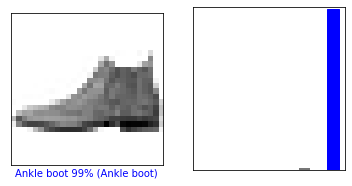

In [74]:
i = 0
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1, 2, 2)
plot_value_arrray(i, predictions, test_labels)
plt.show()

### 다른 이미지의 예측을 출력해보자. 바르게 예측된 레이블은 파란색이고 잘 못 예측된 레이블은 빨강색이다.
### 숫자는 예측 레이블의 신뢰도 퍼센트(정확도)이다.
### 신뢰도 점수가 높을 때도 잘 못 예측 할 수 있다.

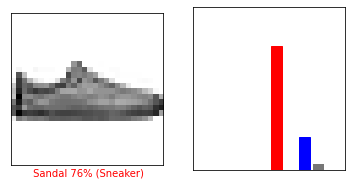

In [75]:
i = 12
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1, 2, 2)
plot_value_arrray(i, predictions, test_labels)
plt.show()

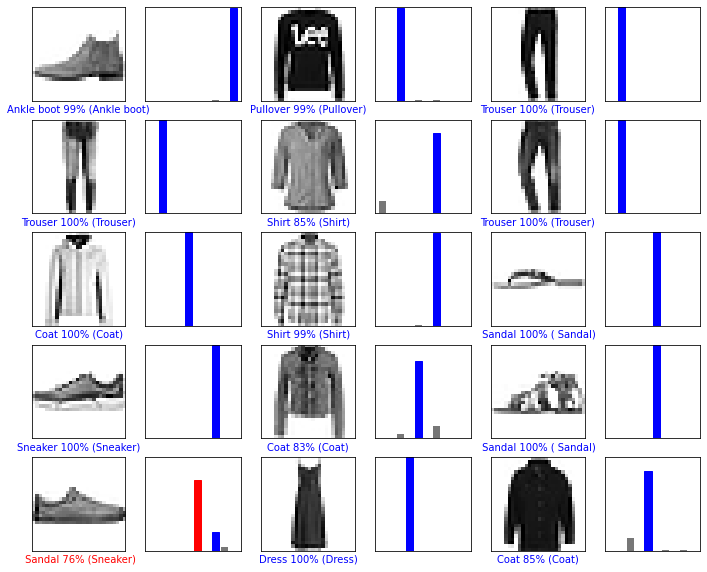

In [78]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력.
# 올바른 예측은 파랑, 잘못된 예측은 빨강으로 나타난다.

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2 * 2* num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_arrray(i, predictions, test_labels)

plt.show()

## 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만든다.

In [79]:
# 테스트 세트에서 이미지 하느를 선택한다.
img = test_images[0]

print(img.shape)

(28, 28)


## **tf.keras 모델**은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화되어 있다.
## **하나의 이미지를 사용**할 때에도 **2차원 배열**로 만들어야한다.

In [80]:
# 이미지 하나만 사용할 떄도 배치에 추가한다.
img = (np.expand_dims(img, 0)) # "np.expand"로 2차원에 배치를 추가

print(img.shape)

(1, 28, 28)


### 이제 이 이미지의 예측을 만든다.

In [81]:
predictions_single = model.predict(img)

print(predictions_single) # 제일 마지막 값이 가장 크다.

[[6.1217371e-08 1.3634563e-11 1.3110611e-10 9.0250939e-11 3.4317471e-10
  7.9375150e-04 3.9842352e-08 1.1411908e-02 6.5831038e-08 9.8779404e-01]]


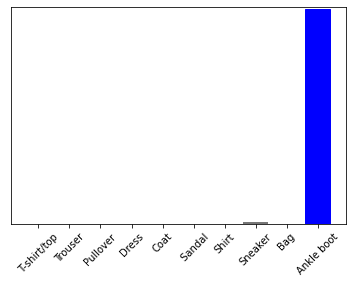

In [83]:
plot_value_arrray(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

### **model.predict**는 2차원 넘파이 배열을 반환하므로 첫 번째 이미지의 예측을 선택한다.

In [84]:
np.argmax(predictions_single[0]) # 인덱스 값으로 "9"가 가장 정확도가 높다고 출력 된다.

9